In [1]:
from numpy import mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

In [3]:
data = dataframe.values

In [4]:
ix = [i for i in range(data.shape[1]) if i != 23]

In [5]:
X, y = data[:, ix], data[:, 23]

In [6]:
results = list()

In [7]:
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']

In [8]:
for s in strategies:
    pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>ascending 0.872 (0.052)
>descending 0.871 (0.055)
>roman 0.872 (0.053)
>arabic 0.872 (0.052)
>random 0.873 (0.054)


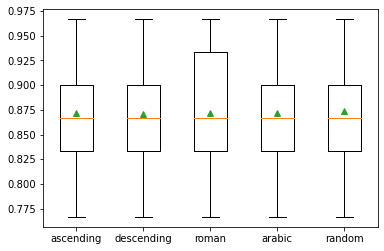

In [9]:
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()